In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

Kelompok :

*   Rashad Shaquille Taofik 10124050
*   Hilyati Raihatul Jannah 10124053
*   Irham Rizqan Zakiy 10124055
*   Siti Atsiilah Maisaan Nurhaeni 10124057
*   Olivia Nathania Sipayung 10124087
*   Tabhita Gialaista 10124093

In [38]:
df = pd.read_csv('BBC_News_processed.csv')
print(df.head())
df['Category'] = df['Category'].str.lower().str.strip()
print(df['Category'].value_counts())


   Unnamed: 0  ArticleId                                               Text  \
0           0       1833  worldcom ex-boss launches defence lawyers defe...   
1           1        154  german business confidence slides german busin...   
2           2       1101  bbc poll indicates economic gloom citizens in ...   
3           3       1976  lifestyle  governs mobile choice  faster  bett...   
4           4        917  enron bosses in $168m payout eighteen former e...   

   Category  News_length                                        Text_parsed  \
0  business         1866  worldcom exboss launches defence lawyers defen...   
1  business         2016  german business confidence slides german busin...   
2  business         3104  bbc poll indicates economic gloom citizens maj...   
3      tech         3618  lifestyle governs mobile choice faster better ...   
4  business         2190  enron bosses 168m payout eighteen former enron...   

   Category_target  
0                0  
1       

In [39]:
label_map = {
    0: 'business',
    1: 'entertainment',
    2: 'politics',
    3: 'sport',
    4: 'tech'
}

In [40]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['Text'] = df['Text'].apply(clean_text)

In [41]:
le = LabelEncoder()
label_angka = le.fit_transform(df['Category'])
label_kelas = to_categorical(label_angka)

print(le.classes_)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [42]:
teks_latih, teks_test, label_latih, label_test = train_test_split(
    df['Text'],
    label_kelas,
    test_size=0.2,
    random_state=42,
    stratify=label_angka
)

In [43]:
max_words = 10000
max_len = 50

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(teks_latih)

sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test  = tokenizer.texts_to_sequences(teks_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=max_len)
padded_test  = pad_sequences(sekuens_test,  maxlen=max_len)

In [44]:
model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    LSTM(32, return_sequences=False, recurrent_dropout=0.3),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(label_kelas.shape[1], activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    padded_latih,
    label_latih,
    epochs=12,
    validation_data=(padded_test, label_test),
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/12
38/38 - 10s - 251ms/step - accuracy: 0.2399 - loss: 1.6063 - val_accuracy: 0.3792 - val_loss: 1.5947
Epoch 2/12
38/38 - 5s - 134ms/step - accuracy: 0.4027 - loss: 1.5068 - val_accuracy: 0.4497 - val_loss: 1.3475
Epoch 3/12
38/38 - 7s - 178ms/step - accuracy: 0.4220 - loss: 1.3161 - val_accuracy: 0.4430 - val_loss: 1.2235
Epoch 4/12
38/38 - 5s - 138ms/step - accuracy: 0.4690 - loss: 1.1441 - val_accuracy: 0.4732 - val_loss: 1.1177
Epoch 5/12
38/38 - 10s - 266ms/step - accuracy: 0.5092 - loss: 1.0485 - val_accuracy: 0.4765 - val_loss: 1.0459
Epoch 6/12
38/38 - 6s - 157ms/step - accuracy: 0.5822 - loss: 0.9199 - val_accuracy: 0.5805 - val_loss: 1.0048
Epoch 7/12
38/38 - 9s - 249ms/step - accuracy: 0.6963 - loss: 0.8004 - val_accuracy: 0.6879 - val_loss: 0.8609
Epoch 8/12
38/38 - 6s - 157ms/step - accuracy: 0.8003 - loss: 0.5997 - val_accuracy: 0.7383 - val_loss: 0.7418
Epoch 9/12
38/38 - 10s - 269ms/step - accuracy: 0.8674 - loss: 0.4343 - val_accuracy: 0.7718 - val_loss: 0.649

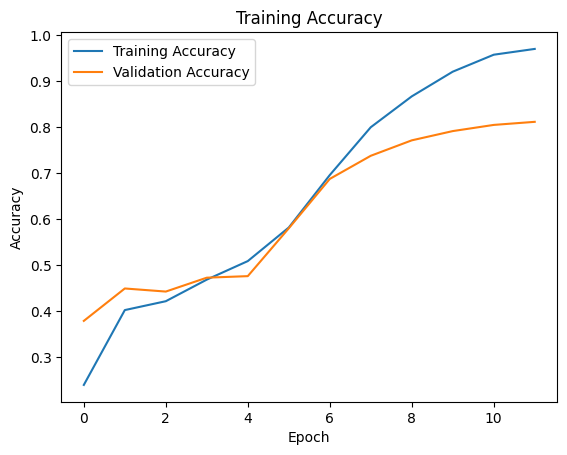

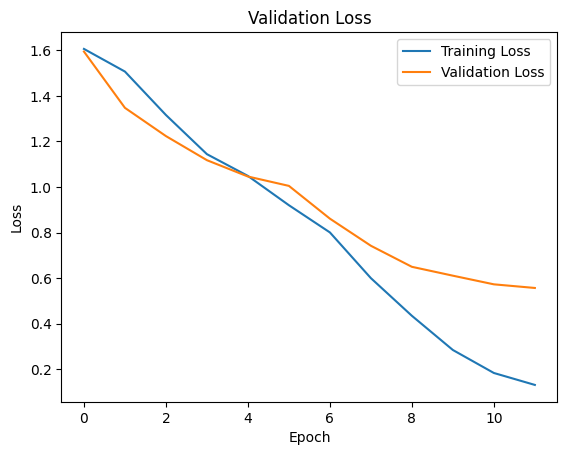

In [46]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
contoh = ["The company reported strong quarterly profits driven by increased global demand."]

seq = tokenizer.texts_to_sequences(contoh)
pad = pad_sequences(seq, maxlen=max_len)

pred = model.predict(pad)
hasil = np.argmax(pred)

print("Prediksi kategori:", label_map[hasil])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Prediksi kategori: business
